In [ ]:
import pandas as pd
import numpy as np
import random
import timeit
import pickle
import time
import matplotlib.pyplot as plt

# Read data

In [ ]:
def get_distance(dataset):
  distance_arr = []
  for i in range(len(dataset)):
    distance = []
    for j in range(len(dataset)):
      a = np.array([dataset['x'][i], dataset['y'][i]])
      b = np.array([dataset['x'][j], dataset['y'][j]])
      distance.append(np.linalg.norm(a-b))
    distance_arr.append(distance)
  return np.array(distance_arr)

In [ ]:
df_A100 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroA100.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})
df_A200 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroA200.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})
# df_B100 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroB100.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})
# df_B200 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroB200.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})

In [ ]:
dis_a100 = get_distance(df_A100)
dis_a200 = get_distance(df_A200)
# dis_b100 = get_distance(df_B100)
# dis_b200 = get_distance(df_B200)

In [ ]:
bestTour_A100 = [75, 32, 12, 94, 81, 36, 4, 95, 77, 51, 47, 99, 40, 70, 13, 2, 42, 45, 28, 33, 6, 56, 86, 50, 60, 57, 66, 88, 30, 79, 41, 7, 74, 89, 83, 35, 98, 37, 23, 17, 93, 87, 15, 21, 69, 52, 78, 9, 71, 20, 73, 58, 16, 14, 10, 31, 44, 90, 92, 27, 0, 91, 55, 96, 3, 64, 25, 65, 18, 48, 5, 62, 46, 97, 22, 76, 59, 61, 19, 85, 34, 26, 11, 54, 82, 8, 24, 80, 68, 72, 67, 84, 29, 38, 49, 43, 1, 53, 39, 63]

In [ ]:
bestTour_A200 = [33, 89, 142, 24, 16, 111, 119, 66, 176, 12, 197, 190, 0, 52, 114, 116, 110, 39, 146, 191, 13, 107, 157, 76, 79, 150, 186, 5, 108, 106, 156, 46, 30, 162, 105, 148, 43, 187, 62, 15, 117, 123, 60, 135, 120, 173, 158, 23, 31, 25, 198, 6, 81, 77, 8, 137, 36, 183, 28, 109, 17, 48, 92, 3, 100, 59, 192, 127, 166, 163, 139, 88, 58, 68, 99, 32, 44, 196, 96, 80, 155, 179, 130, 188, 40, 29, 67, 168, 167, 184, 61, 82, 53, 64, 26, 11, 65, 152, 47, 165, 95, 86, 125, 164, 103, 118, 189, 171, 45, 131, 84, 144, 122, 14, 78, 159, 161, 54, 185, 154, 182, 7, 145, 102, 113, 97, 87, 38, 129, 71, 49, 138, 85, 94, 93, 181, 194, 112, 175, 132, 136, 42, 104, 4, 195, 177, 151, 55, 70, 37, 27, 147, 199, 170, 140, 57, 128, 133, 21, 74, 126, 41, 134, 19, 63, 160, 124, 180, 1, 34, 22, 172, 149, 90, 143, 69, 75, 101, 20, 153, 72, 2, 141, 73, 56, 35, 174, 9, 91, 98, 18, 178, 50, 193, 115, 121, 169, 83, 10, 51]

In [ ]:
bestTour_B100 = [52, 0, 84, 14, 78, 30, 5, 53, 61, 82, 71, 49, 85, 4, 42, 55, 70, 37, 27, 38, 21, 74, 46, 66, 12, 26, 39, 11, 3, 59, 29, 67, 1, 34, 22, 90, 94, 93, 75, 69, 20, 88, 40, 58, 72, 2, 68, 73, 56, 35, 9, 91, 18, 98, 92, 48, 17, 28, 60, 25, 6, 81, 77, 8, 31, 23, 45, 36, 15, 50, 62, 43, 65, 47, 95, 86, 51, 10, 83, 96, 80, 44, 32, 99, 13, 76, 79, 64, 63, 19, 54, 41, 7, 16, 24, 89, 33, 57, 97, 87]

In [ ]:
bsetTour_B200 = [87, 147, 27, 38, 37, 55, 151, 177, 195, 138, 49, 184, 167, 172, 168, 67, 29, 76, 157, 127, 98, 118, 47, 51, 10, 9, 174, 35, 56, 73, 99, 155, 32, 92, 162, 3, 58, 2, 72, 188, 130, 179, 141, 68, 107, 100, 146, 39, 110, 116, 114, 52, 0, 190, 79, 160, 124, 180, 1, 34, 22, 143, 149, 90, 93, 94, 136, 42, 104, 4, 70, 129, 71, 82, 53, 5, 186, 150, 64, 12, 14, 144, 84, 131, 45, 171, 135, 25, 198, 6, 81, 77, 8, 137, 183, 28, 109, 17, 189, 18, 91, 196, 44, 80, 96, 152, 65, 48, 11, 26, 197, 122, 78, 159, 63, 19, 134, 41, 119, 108, 61, 85, 132, 175, 112, 194, 181, 75, 69, 101, 163, 139, 20, 153, 88, 40, 166, 105, 148, 178, 62, 193, 50, 36, 120, 173, 158, 23, 31, 60, 123, 117, 15, 43, 187, 115, 121, 169, 83, 165, 95, 86, 125, 164, 103, 13, 191, 59, 192, 176, 161, 54, 185, 126, 111, 154, 182, 7, 128, 113, 97, 199, 170, 140, 57, 33, 89, 24, 16, 142, 102, 145, 133, 21, 74, 106, 156, 46, 30, 66]

# Define Function

In [ ]:
def extractWeed(results):
  results_length = []
  results_tour = []
  for weeds in results:
    tmpLength = []
    tmpTour = []
    for weed in weeds:
      tmpLength.append(weed.length)
      tmpTour.append(weed.tour)
    results_length.append(tmpLength)
    results_tour.append(tmpTour)
  return results_length, results_tour

In [ ]:
def extractPair(tour):
  tourPairs = []
  for i in range(len(tour)-1):
    tourPairs.append([tour[i],tour[i+1]])
  return tourPairs

def calculateLength(tour, distance):
  d = 0
  for i in range(len(tour)-1):
    d = d + distance[tour[i]][tour[i+1]]
  return d

In [ ]:
class InvasiveWeed:

  def __init__(self, cityNumber=None, distanceMatrix=None, isSeed=False):
    if (isSeed):
      self.tour = []
      self.length = 0
    else:
      self.tour = np.random.randint(2, size=30)
      random.shuffle(self.tour)
      self.length =  self.tour.sum()

  def setSeed(self, tour, length):
    self.tour = tour
    self.length = length

  def generateSeed(self, M, distanceMatrix):
    newSeed = InvasiveWeed(isSeed=True)
    newSeed.tour = [1 if np.round(np.random.normal(0,0.6,1))[0] > 1 else 0 for n in self.tour].copy()
    newSeed.length = sum(newSeed.tour)
    return newSeed

  def __str__(self):
    return f'Length: {self.length}, Tour: {self.tour[:10]} ... {self.tour[-10:]}'

  def __repr__(self):
    return f'Length: {self.length}, Tour: {self.tour[:10]} ... {self.tour[-10:]}'

  def __lt__(self, other):
    return self.length > other.length

In [ ]:
def initialPopulation(weedNumber, cityNumber, distanceMatrix):
  population = []
  for i in range(weedNumber):
    population.append(InvasiveWeed(cityNumber, distanceMatrix))
  return population

In [ ]:
def MPF(series, case, i, j):
  # print(f'case= {case}, i = {i}, j = {j}, {series}')
  if (i == j): return False

  if (case == 1):
    if (i < j):
      tmp = series[i]
      series[i:j-1] = series[i+1:j]
      series[j-1] = tmp
    else:
      tmp = series[i]
      series[i+1:j+1] = series[i:j]
      series[i] = tmp

  elif (case == 2):
    if (i < j):
      tmp = series[j]
      series[i+1:j+1] = series[i:j]
      series[i] = tmp
    else:
      tmp = series[j]
      series[j: i-1] = series[j+1:i]
      series[i-1] = tmp

  elif (case == 3):
    if(i < j):
      tmp = series[i]
      series[i:j] = series[i+1:j+1]
      series[j] = tmp
    else:
      tmp = series[i]
      series[j+2:i+1] = series[j+1:i]
      series[j+1] = tmp

  elif (case == 4):
      series[i], series[j] = series[j], series[i]

  return True

In [ ]:
def getLinearParameter(worstLength, lowestSeedAmount, bestLength, highestSeedAmount):
  m =  (highestSeedAmount-lowestSeedAmount)/((bestLength-worstLength)+1) #(y2-y1)/(x2-x1)
  c =  (m*(bestLength+worstLength)-(highestSeedAmount+lowestSeedAmount))/2 #(m*(x2+x1)-(y2+y1))/2
  return m, c

In [ ]:
def getSeedAmount(length, m, c):
  return round(m*(length) - c)

In [ ]:
def getM(iter, iterMax, MStart, MEnd, n=3):
  return (((iterMax-iter)/iterMax)**n)*(MStart-MEnd) + MEnd

# Experiment

In [ ]:
def optimize(population, smin, smax, iterMax, MStart, MEnd, n, pmax):

  start = time.time()
  populationResult = []
  population.sort()
  for iter in range(iterMax):

    # 2. reproduction
    m, c = getLinearParameter(population[-1].length, smin, population[0].length, smax)

    # 3. Spatial dispersal
    newSeed = []
    M = round(getM(iter, iterMax, MStart, MEnd, n))
    for parent in population:
      for _ in range(getSeedAmount(parent.length, m, c)):
        newSeed.append(parent.generateSeed(M, None))

    # 4. Competitive exclusion
    population = population + newSeed
    population.sort()
    if(len(population) > pmax): population = population[:pmax]

    populationResult.append(population[0])
    if(iter%20000 == 0): print(f'round:{iter}, {population[0]}')
  return populationResult, (time.time()-start)

# A100

In [ ]:
smin = 0
smaxs = [3,5]
iterMax = 1000
MStart = 10
MEnds = [1,2,3]
n = 3
pmaxs = [20,40,60]
results = []
times = []

In [ ]:
initial_pop = initialPopulation(30,30, None)

for i in range(100):
  tmpResult, tmpTime = optimize(initial_pop.copy(), smin=0, smax=3, iterMax=100, MStart=0.6, MEnd=0.1, n=0, pmax=20)
  results.append(tmpResult)
  times.append(tmpTime)

round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour: [1 1 0 1 1 1 0 0 1 1] ... [1 1 0 0 0 0 0 0 1 1]
round:0, Length: 18, Tour

KeyboardInterrupt: ignored

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Colab Notebooks/time_A100.pickle", 'wb') as f:
#     pickle.dump([results, times], f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/time_A100.pickle', 'rb') as f:
    results, times = pickle.load(f)

In [ ]:
res_l, res_t = extractWeed(results)

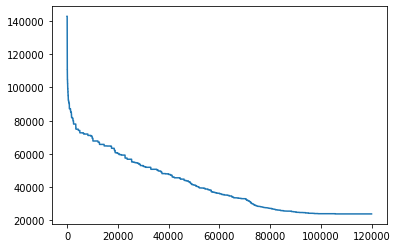

In [ ]:
plt.plot(res_l[8])

# A200

In [ ]:
smin = 0
smaxs = [3,5]
iterMax = 120000
MStart = 10
MEnds = [1,3]
n = 3
pmaxs = [20,60]
results = []
times = []

In [ ]:
initial_pop = initialPopulation(100,200, dis_a200)
for smax in smaxs:
  for MEnd in MEnds:
    for pmax in pmaxs:
      tmpResult, tmpTime = optimize(initial_pop.copy(), smin, smax, iterMax, MStart, MEnd, n, pmax, dis_a200)
      results.append(tmpResult)
      times.append(tmpTime)

round:0, Length: 299698.15829660755, Tour: [165, 116, 102, 28, 11, 62, 157, 171, 90, 59] ... [33, 113, 177, 77, 97, 180, 87, 160, 103, 66]
round:20000, Length: 135611.13275380936, Tour: [131, 50, 169, 135, 60, 123, 56, 191, 52, 12] ... [55, 151, 195, 170, 140, 97, 24, 16, 147, 181]
round:40000, Length: 90528.90781045164, Tour: [45, 190, 63, 54, 108, 5, 74, 21, 46, 111] ... [140, 89, 24, 16, 129, 71, 104, 112, 181, 94]
round:60000, Length: 52785.77558391739, Tour: [41, 134, 111, 156, 108, 5, 53, 186, 160, 40] ... [140, 33, 89, 24, 16, 142, 145, 38, 71, 138]
round:80000, Length: 38998.07227972392, Tour: [134, 41, 126, 111, 106, 108, 186, 150, 160, 40] ... [147, 199, 170, 140, 57, 33, 89, 142, 24, 16]
round:100000, Length: 38820.6363383594, Tour: [134, 41, 185, 126, 111, 106, 108, 186, 150, 160] ... [147, 199, 170, 140, 57, 33, 89, 142, 24, 16]
round:0, Length: 300445.097719196, Tour: [41, 93, 91, 50, 62, 52, 7, 63, 28, 115] ... [16, 133, 160, 167, 166, 17, 86, 161, 100, 35]
round:20000, 

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Colab Notebooks/time_A200.pickle", 'wb') as f:
#     pickle.dump([results, times], f)